# Importing Necessary Libraries

In [8]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier

import warnings

warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df
df.columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [10]:
df.shape

(213, 11)

In [11]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Checking Null values

In [12]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

# Insights of DataSet

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [14]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [15]:
df.drop(['Id'], axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type of glass'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

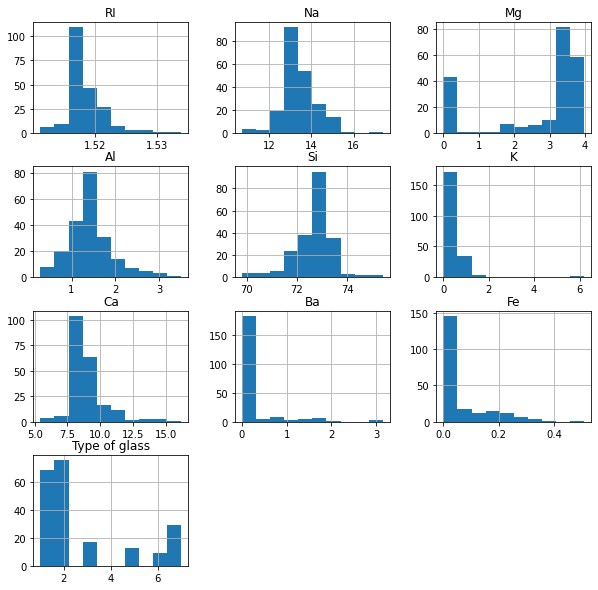

In [16]:
df.hist(figsize= (10,10))

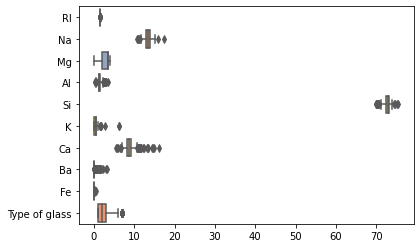

In [17]:
boxplot = sns.boxplot(data=df, orient="h", palette="Set2")

It seems the data has so many outliers let's find correlation among them

In [18]:
corr = df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type of glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


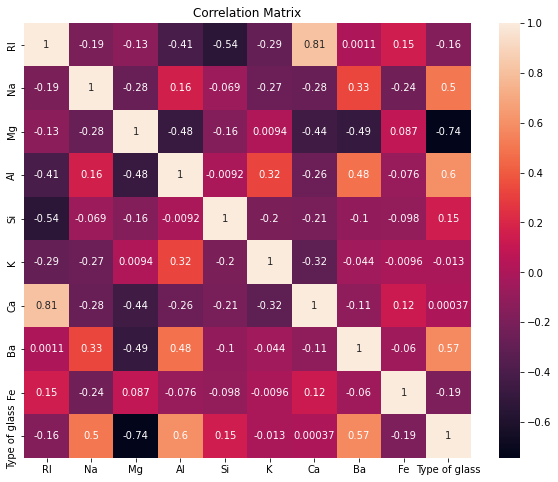

In [71]:
corr_mat = df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

With the above correlation matrix we can identify RI ,Ca has high correlation

<AxesSubplot:xlabel='RI'>

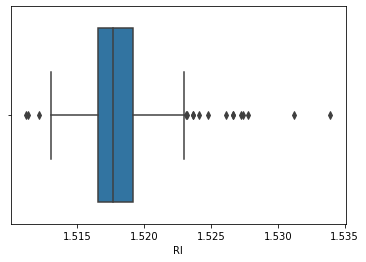

In [20]:
import seaborn as sns
sns.boxplot(df['RI'])

There are many outlier let's see can we remove them or not

<AxesSubplot:xlabel='Mg'>

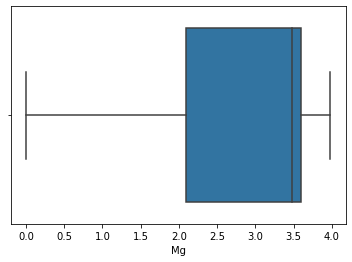

In [21]:
import seaborn as sns
sns.boxplot(df['Mg'])

<AxesSubplot:xlabel='Al'>

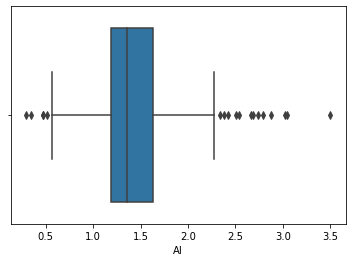

In [22]:
import seaborn as sns
sns.boxplot(df['Al'])

<AxesSubplot:xlabel='Si'>

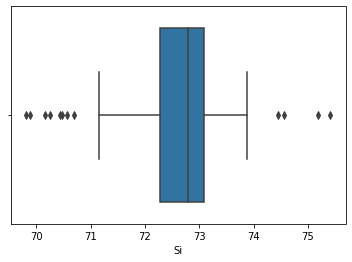

In [23]:
import seaborn as sns
sns.boxplot(df['Si'])

<AxesSubplot:xlabel='K'>

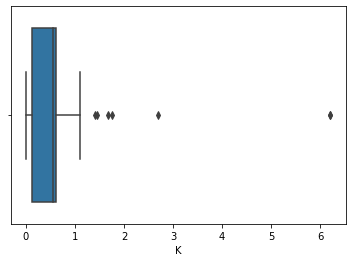

In [24]:
import seaborn as sns
sns.boxplot(df['K'])

<AxesSubplot:xlabel='Ca'>

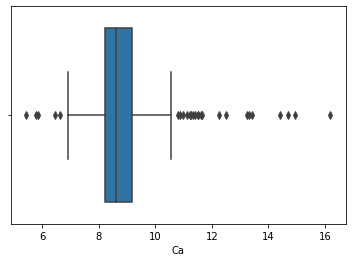

In [25]:
import seaborn as sns
sns.boxplot(df['Ca'])

<AxesSubplot:xlabel='Ba'>

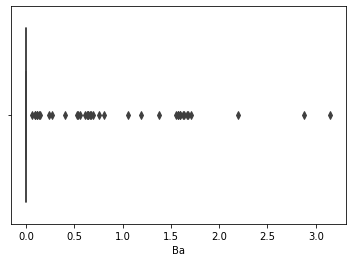

In [26]:
import seaborn as sns
sns.boxplot(df['Ba'])

With the above Diagrams we can identify that there are many ouliers in RI,Al,Si,K,Ca,Ba We can't ignore them all and remove them

[]

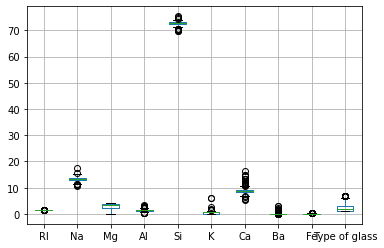

In [27]:
df.boxplot(return_type='dict')
plt.plot()

# Let's Build Model with considering Outliers.

# Model Building:-

In [28]:
X=df.drop(columns=['Type of glass'],axis=1)
y=df['Type of glass']

In [29]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [30]:
X_scaled

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

In [33]:
vif["features"] = X.columns
vif

,vif,features
0,9.512636,RI
1,61.800820,Na
2,206.400829,Mg
3,25.629094,Al
4,57.871368,Si
5,43.577914,K
6,211.664529,Ca
7,26.151119,Ba
8,1.219902,Fe


From the above we can identify that all the features have high variance except Fe

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=9)

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [37]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 78.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.79      0.81        28
           2       0.71      0.77      0.74        22
           3       0.50      0.50      0.50         2
           5       1.00      0.60      0.75         5
           6       0.50      1.00      0.67         1
           7       0.86      1.00      0.92         6

    accuracy                           0.78        64
   macro avg       0.74      0.78      0.73        64
weighted avg       0.80      0.78      0.78        64



# The model showing highest accuracy so we need to take hyper parameter with Grid SearchCV to overcome Overfitting

# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
params ={'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15]} 

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 15}


In [41]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=15)

In [42]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 79.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.79      0.80        28
           2       0.73      0.73      0.73        22
           3       0.67      1.00      0.80         2
           5       1.00      0.80      0.89         5
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         6

    accuracy                           0.80        64
   macro avg       0.78      0.89      0.81        64
weighted avg       0.81      0.80      0.80        64



With the Cross - validation the result showing 100% but test result decreased to 81% to 75% let's consider other models also

# KNeighborsClassifier

In [43]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [44]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 69.80%

======TestResult========
Accuracy Score: 68.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        28
           2       0.57      0.55      0.56        22
           3       0.00      0.00      0.00         2
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.69        64
   macro avg       0.67      0.66      0.66        64
weighted avg       0.67      0.69      0.67        64



# Hyperparameter Tuning

In [46]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[3,5,6,7,8],
             'n_neighbors':[3,5,7,9,11,13]}

In [47]:
gridsearch = GridSearchCV(estimator=knn,
                         param_grid=param_grid)


In [48]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [49]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [50]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [51]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 79.87%

======TestResult========
Accuracy Score: 73.44%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.75      0.75      0.75        28
           2       0.68      0.68      0.68        22
           3       0.33      0.50      0.40         2
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.73        64
   macro avg       0.75      0.76      0.75        64
weighted avg       0.74      0.73      0.74        64



With the cross - validation the model accuracy score imporved

# Decision Tree Classifier

In [52]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [53]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 71.88%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.77      0.71      0.74        28
           2       0.67      0.64      0.65        22
           3       0.67      1.00      0.80         2
           5       0.75      0.60      0.67         5
           6       0.33      1.00      0.50         1
           7       0.86      1.00      0.92         6

    accuracy                           0.72        64
   macro avg       0.67      0.83      0.71        64
weighted avg       0.73      0.72      0.72        64



# Hyper parameter Tuning

In [55]:
grid_param = {'criterion':['gini','entrophy'],
             'max_depth':range(5,7),
             'min_samples_leaf':range(2,6),
             'min_samples_split':range(3,8),
             'max_leaf_nodes':range(5,10)}

In [56]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,cv=5,n_jobs=-1)

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(5, 7),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [58]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [59]:
clf = DecisionTreeClassifier(criterion='gini',
                            min_samples_split=3,max_depth=10,
                            min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [60]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 89.93%

======TestResult========
Accuracy Score: 68.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.72      0.75      0.74        28
           2       0.68      0.59      0.63        22
           3       0.33      0.50      0.40         2
           5       0.75      0.60      0.67         5
           6       0.33      1.00      0.50         1
           7       0.83      0.83      0.83         6

    accuracy                           0.69        64
   macro avg       0.61      0.71      0.63        64
weighted avg       0.70      0.69      0.69        64



With cross validation the test result accuracy remains same no improvement

# Gradient Boosting Classifier

In [61]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    
    if train:
        
        y_pred=clf.predict(x_train)
        
        print('\n=========TrainResult========')
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n======TestResult========")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [62]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 78.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.86      0.68      0.76        28
           2       0.76      0.86      0.81        22
           3       0.33      1.00      0.50         2
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       0.86      1.00      0.92         6

    accuracy                           0.78        64
   macro avg       0.80      0.86      0.79        64
weighted avg       0.82      0.78      0.79        64



# Hyper parameter Tuning

In [64]:
grid_param = {'max_depth':range(4,8),
             'min_samples_split':range(2,8,2),
             'learning_rate':np.arange(0.1,0.3)}

In [65]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [66]:
grid.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 6}

In [67]:
gbdt_clf = GradientBoostingClassifier(max_depth=8,min_samples_split=2,learning_rate = 0.1)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8)

In [68]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


=========TrainResult========
Accuracy Score: 100.00%

======TestResult========
Accuracy Score: 79.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.88      0.75      0.81        28
           2       0.72      0.82      0.77        22
           3       0.67      1.00      0.80         2
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         6

    accuracy                           0.80        64
   macro avg       0.84      0.86      0.83        64
weighted avg       0.82      0.80      0.80        64



With hyper parameter traing, test result increased 

by comparing all modesl which has high test result can be taken as consideration to find Type of glass ie.RandomForestClassifier

In [69]:
import pickle
filename = 'Glass Identification Dataset project.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))